In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import torch
import pickle as pkl

In [3]:
PATH='order/'

In [4]:
num_df = pd.read_csv('ivr_backup_data/order_num_df.csv')
cat_df = pd.read_csv('ivr_backup_data/order_category_df.csv')
target_df = pd.read_csv('ivr_backup_data/target_df.csv')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
num_df.shape

(244134, 30)

In [6]:
num_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD_RETRY_COUNT,PREORDER_LINES,ALLOWED_LINES,APPROVED_LINES,EXTERNAL_APPROVED_LINES,FIRST_PARTY_ID_SCORE,THIRD_PARTY_ID_SCORE,PRICE1,PRICE2,ORDER_CREATED_DATE
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,0,0.0,5,5,0,553,520,599.99,599.99,1.558789e+09
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,4,0,0,485,502,0.00,0.00,1.571514e+09
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,4,0.0,5,5,0,370,361,999.99,0.00,1.568388e+09
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,0,0.0,4,0,4,504,554,549.99,0.00,1.568843e+09
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,3,5,0,386,517,469.99,0.00,1.570415e+09


In [7]:
cat_df.head()

,MODEL1,MAKE2,BILLING_STATE,TYPE3,TYPE2,BLACKLIST_EMAIL,YELLOW_SKU,MODEL4,TPF_HIGH_YELLOW,ACCOUNT_NUMBER,...,BYOD1,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5
0,iPhone 8,Apple,MN,Phone,Phone,N,N,moto e5 play,N,716308354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iPhone 6,NaN,MN,NaN,NaN,N,N,NaN,N,2387138088,...,APLIPHONE6GOLD64,NaN,NaN,NaN,NaN,MetroPCS,NaN,NaN,NaN,NaN
2,iPhone 11 Pro,NaN,MN,NaN,NaN,N,N,NaN,N,2297289602,...,NaN,NaN,NaN,NaN,NaN,GoogleVoice,NaN,NaN,NaN,NaN
3,iPhone 8 Plus,NaN,MN,NaN,NaN,N,N,NaN,N,2747556495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iPhone 7 Plus,NaN,MN,NaN,NaN,N,N,NaN,N,3159523017,...,190198155795,NaN,NaN,NaN,NaN,Other/NotSure,NaN,NaN,NaN,NaN


In [8]:
len(cat_df['IDA_RESULT'].unique())

4

In [9]:
# inner_train_df['IDA_RESULT'].unique()

In [10]:
# inner_train_df['MAKE1'].unique()

In [11]:
# cat_df['EXPERIAN_RESPONSE_1'].unique()

In [12]:
cat_df.shape

(244134, 51)

In [13]:
cat_df.columns

Index(['MODEL1', 'MAKE2', 'BILLING_STATE', 'TYPE3', 'TYPE2', 'BLACKLIST_EMAIL',
       'YELLOW_SKU', 'MODEL4', 'TPF_HIGH_YELLOW', 'ACCOUNT_NUMBER',
       'EXTERNAL_CREDIT_CHECK_DONE', 'IS_EXISTING_CUSTOMER', 'FRAUDNET_RESULT',
       'MAKE4', 'LINE_LIMIT_REACHED', 'MAKE1', 'IDA_RESULT',
       'EXPERIAN_RESPONSE_1', 'EXPERIAN_RESPONSE_2', 'MODEL2', 'TYPE1',
       'SHIPPING_STATE', 'SALES_CHANNEL', 'TYPE4', 'MAKE5', 'MODEL5',
       'DEVICE_AT_HOME', 'SSN_BLACKLISTED', 'MAKE3', 'TYPE5',
       'DENIAL_OF_SERVICES', 'FPF_HIGH_YELLOW', 'SHIPPINGMETHOD',
       'INTERNAL_CREDIT_CHECK_DONE', 'ORDER_EXCHANGE', 'MODEL3', 'SKU1',
       'SKU2', 'SKU3', 'SKU4', 'SKU5', 'BYOD1', 'BYOD2', 'BYOD3', 'BYOD4',
       'BYOD5', 'CARRIER1', 'CARRIER2', 'CARRIER3', 'CARRIER4', 'CARRIER5'],
      dtype='object')

In [14]:
target_df.columns

Index(['ACTIVE_WATCH_RESULT'], dtype='object')

In [15]:
target_df.head()

,ACTIVE_WATCH_RESULT
0,3
1,1
2,1
3,1
4,1


In [16]:
target_df.shape

(244134, 1)

In [17]:
ivr_df = pd.concat([num_df, cat_df, target_df], axis=1)

In [18]:
ivr_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5,ACTIVE_WATCH_RESULT
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,NaN,NaN,NaN,NaN,MetroPCS,NaN,NaN,NaN,NaN,1
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,NaN,NaN,NaN,NaN,GoogleVoice,NaN,NaN,NaN,NaN,1
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,NaN,NaN,NaN,NaN,Other/NotSure,NaN,NaN,NaN,NaN,1


In [19]:
# ivr_df[ivr_df['ACCOUNT_NUMBER'].isna()].shape

In [20]:
ivr_df.shape

(244134, 82)

In [21]:
# reduced_ivr = ivr_df.sample(n=10000)

In [22]:
# reduced_ivr.shape

In [23]:
# ivr_df.dtypes

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ivr_df, test_size=0.01)  # don't care about classification testing, only embeddings

In [26]:
# train_df = pd.read_feather(f'{PATH}joined')
# test_df = pd.read_feather(f'{PATH}joined_test')

In [27]:
len(train_df),len(test_df)

(241692, 2442)

In [28]:
import sys
# we use the standard fastai libs throughout
# no customization is done
# sys.path.append("/mnt/azmnt/code/Users/bho829/fastai")
# sys.path.append("/mnt/azmnt/code/Users/bho829/fastai/fastai")

In [29]:
from fastai.tabular.transform import *

In [30]:
procs=[FillMissing, Categorify, Normalize]

In [31]:
cat_vars = ['IDA_RESULT', 'MAKE1', 'EXPERIAN_RESPONSE_1', 'SHIPPINGMETHOD', 'MAKE4',
       'MAKE5', 'MODEL5', 'EXPERIAN_RESPONSE_2', 'ACCOUNT_NUMBER',
       'FRAUDNET_RESULT', 'SSN_BLACKLISTED', 'BLACKLIST_EMAIL',
       'SALES_CHANNEL', 'YELLOW_SKU', 'TYPE1', 'EXTERNAL_CREDIT_CHECK_DONE',
       'TYPE5', 'MODEL3', 'TPF_HIGH_YELLOW', 'TYPE2', 'SHIPPING_STATE',
       'DEVICE_AT_HOME', 'ORDER_EXCHANGE', 'TYPE3', 'MODEL4',
       'IS_EXISTING_CUSTOMER', 'LINE_LIMIT_REACHED',
       'INTERNAL_CREDIT_CHECK_DONE', 'FPF_HIGH_YELLOW', 'MODEL2', 'MAKE3',
       'MODEL1', 'DENIAL_OF_SERVICES', 'MAKE2', 'TYPE4', 'BILLING_STATE',
       'SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'BYOD1', 'BYOD2', 'BYOD3',
       'BYOD4', 'BYOD5', 'CARRIER1', 'CARRIER2', 'CARRIER3', 'CARRIER4',
       'CARRIER5']
cont_vars = ['FRAUDNET_SCORE',
 'TOTAL_PRICE',
 'PRICE3',
 'PRICE4',
 'PRICE5',
 'NUM_PORTIN',
 'ACNT_BILL_FNAME_MATCHES',
 'ACNT_BILL_LNAME_MATCHES',
 'ACNT_SHIP_FNAME_MATCHES',
 'ACNT_SHIP_LNAME_MATCHES',
 'SHIP_BILL_FNAME_MATCHES',
 'SHIP_BILL_LNAME_MATCHES',
 'BILL_SHIP_ADDR_MATCHES',
 'EMAIL',
 'IP_ADDRESS',
 'PHONE_MATCHES',
 'NUM_BYOD',
 'INSTALLMENT_AMOUNT',
 'ONETIMECHARGE',
 'MONTHLYRECURRINGCHARGE',
 'BYOD_RETRY_COUNT',
 'PREORDER_LINES',
 'ALLOWED_LINES',
 'APPROVED_LINES',
 'EXTERNAL_APPROVED_LINES',
 'FIRST_PARTY_ID_SCORE',
 'THIRD_PARTY_ID_SCORE',
 'PRICE1',
 'PRICE2',
 'ORDER_CREATED_DATE']

In [32]:
len(cat_vars)

51

In [33]:
cat_dict = {}
i = 0
for cat_var in cat_vars:
#     print('{}th var={}'.format(i, cat_var))
    cat_dict[cat_var] = i
    i += 1

In [34]:
len(cat_dict)

51

In [35]:
with open('ivr_backup_data/cat_dict.pkl', 'wb') as cat_dict_file:
    pkl.dump(cat_dict, cat_dict_file)

In [36]:
cat_index_dict = {}
i = 0
for cat_var in cat_vars:
#     print('{}th var={}'.format(i, cat_var))
    cat_index_dict[i] = cat_var
    i += 1

In [37]:
len(cat_index_dict)

51

In [38]:
with open('ivr_backup_data/cat_index_dict.pkl', 'wb') as cat_index_dict_file:
    pkl.dump(cat_index_dict, cat_index_dict_file)

In [209]:
# len(inner_train_df['IDA_RESULT'].unique())

In [210]:
# len(inner_train_df['MAKE1'].unique())

In [211]:
# inner_train_df.loc[:,'MAKE1'].astype('category').cat.as_ordered()

In [212]:
# categories = {}
# categories['MAKE1'] = inner_train_df['MAKE1'].cat.categories

In [213]:
# categories['MAKE1']

In [39]:
len(cont_vars)

30

In [40]:
dep_var = 'ACTIVE_WATCH_RESULT'
df = train_df[cat_vars + cont_vars + [dep_var]].copy()

In [41]:
len(df['ACCOUNT_NUMBER'].unique())

194285

In [42]:
train_df.shape

(241692, 82)

In [43]:
test_df.shape

(2442, 82)

In [44]:
df[dep_var].head()

36379     1
200146    1
86311     3
236421    1
65867     1
Name: ACTIVE_WATCH_RESULT, dtype: int64

In [45]:
df.shape

(241692, 82)

In [46]:
from fastai.tabular.data import *

In [47]:
path = PATH

In [48]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .random_split_by_pct(valid_pct=0.01, seed=43)    # we don't care much about valid data. just the embeddings
                .label_from_df(cols = dep_var)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars), label=0)
                .databunch())

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [49]:
inner_train_df = data.train_ds.inner_df

In [50]:
inner_train_df.shape

(239276, 82)

In [51]:
inner_train_df.to_csv('ivr_backup_data/inner_train_df.csv', index=False)

In [52]:
len(inner_train_df['ACCOUNT_NUMBER'].unique())

192706

In [53]:
acct_number_df = pd.concat([inner_train_df.ACCOUNT_NUMBER, inner_train_df.ACCOUNT_NUMBER.astype('category').cat.codes.rename("code", inplace=True)], axis=1)

In [54]:
acct_number_df.head()

,ACCOUNT_NUMBER,code
36379,2608741079,117387
200146,2541993372,114398
86311,2676329899,120390
236421,1442915580,64695
65867,1368037653,61410


In [55]:
acct_number_df.shape

(239276, 2)

In [56]:
acct_map = acct_number_df.set_index('ACCOUNT_NUMBER').to_dict()['code']

In [57]:
len(acct_map)

192706

In [58]:
data.show_batch()

IDA_RESULT,MAKE1,EXPERIAN_RESPONSE_1,SHIPPINGMETHOD,MAKE4,MAKE5,MODEL5,EXPERIAN_RESPONSE_2,ACCOUNT_NUMBER,FRAUDNET_RESULT,SSN_BLACKLISTED,BLACKLIST_EMAIL,SALES_CHANNEL,YELLOW_SKU,TYPE1,EXTERNAL_CREDIT_CHECK_DONE,TYPE5,MODEL3,TPF_HIGH_YELLOW,TYPE2,SHIPPING_STATE,DEVICE_AT_HOME,ORDER_EXCHANGE,TYPE3,MODEL4,IS_EXISTING_CUSTOMER,LINE_LIMIT_REACHED,INTERNAL_CREDIT_CHECK_DONE,FPF_HIGH_YELLOW,MODEL2,MAKE3,MODEL1,DENIAL_OF_SERVICES,MAKE2,TYPE4,BILLING_STATE,SKU1,SKU2,SKU3,SKU4,SKU5,BYOD1,BYOD2,BYOD3,BYOD4,BYOD5,CARRIER1,CARRIER2,CARRIER3,CARRIER4,CARRIER5,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,SHIP_BILL_FNAME_MATCHES,SHIP_BILL_LNAME_MATCHES,BILL_SHIP_ADDR_MATCHES,EMAIL,IP_ADDRESS,PHONE_MATCHES,NUM_BYOD,INSTALLMENT_AMOUNT,ONETIMECHARGE,MONTHLYRECURRINGCHARGE,BYOD_RETRY_COUNT,PREORDER_LINES,ALLOWED_LINES,APPROVED_LINES,EXTERNAL_APPROVED_LINES,FIRST_PARTY_ID_SCORE,THIRD_PARTY_ID_SCORE,PRICE1,PRICE2,ORDER_CREATED_DATE,target
GREEN,Apple,#na#,2Days,#na#,#na#,#na#,#na#,1885956164,#na#,N,N,RETAIL,N,Phone,N,#na#,#na#,N,#na#,CA,N,#na#,#na#,#na#,Y,N,Y,N,#na#,#na#,iPhone 11 Pro Max,N,#na#,#na#,CA,190199380790,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,-0.3258,-0.8584,-0.1560,-0.0876,-0.0407,-1.0615,0.4163,0.3654,0.3485,0.3228,0.2649,0.2157,0.3637,1.2009,0.3070,0.5031,-0.5268,1.0989,-0.3636,-1.1965,-0.4284,-0.1936,-0.9632,0.5294,-0.8852,0.5205,0.3417,1.7183,-0.3678,1.0017,1
GREEN,Apple,3100/ACCEPT/Continue/ACCEPT- FraudNet only,2Days,#na#,#na#,#na#,3200/APPROVE/200/No Fraud Detected/No device concerns,4049962652,APPROVE,N,N,ONLINE,N,Phone,Y,#na#,#na#,N,#na#,VA,Y,#na#,#na#,#na#,Y,N,#na#,N,#na#,#na#,iPhone XR,N,#na#,#na#,VA,190198776402,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,0.4276,0.2050,-0.1560,-0.0876,-0.0407,-1.0615,-2.4020,-2.7366,-2.8690,-3.0979,0.2649,0.2157,0.3637,-0.9268,-1.5057,0.5031,-0.5268,0.2793,-0.2086,-0.4814,-0.4284,-0.1936,-2.6327,-0.7512,0.1604,0.0530,-0.9801,0.3620,-0.3678,-2.0652,1
GREEN,Apple,#na#,2Days,#na#,#na#,#na#,#na#,4072579180,#na#,N,N,ONLINE,N,Phone,N,#na#,#na#,N,Phone,NM,N,#na#,#na#,#na#,N,N,Y,N,iPhone 11 Pro Max,#na#,iPhone 11 Pro Max,N,Apple,#na#,NM,190199380752,190199380752,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,VerizonWireless,VerizonWireless,#na#,#na#,#na#,-0.3258,3.2149,-0.1560,-0.0876,-0.0407,1.5433,0.4163,0.3654,0.3485,0.3228,0.2649,0.2157,0.3637,-1.5891,1.5013,0.5031,-0.5268,-0.9493,12.0383,0.1770,-0.4284,-0.1936,0.7062,1.3832,-0.8852,-0.3778,-0.4173,1.7183,4.3388,0.6848,3
GREEN,Apple,#na#,2Days,#na#,#na#,#na#,#na#,3625386187,#na#,N,N,TELESALES,N,Phone,N,#na#,#na#,N,#na#,PA,N,#na#,#na#,#na#,N,N,Y,N,#na#,#na#,iPhone 8 LTE Only,N,#na#,#na#,PA,APLIP8GRAY64N1X,#na#,#na#,#na#,#na#,APLIP8GRAY64N1X,#na#,#na#,#na#,#na#,Other/NotSure,#na#,#na#,#na#,#na#,-0.3258,-1.0409,-0.1560,-0.0876,-0.0407,0.2409,0.4163,0.3654,0.3485,0.3228,0.2649,0.2157,0.3637,-1.1414,0.7975,0.5031,1.1329,-0.9493,-0.3636,-0.1664,2.3343,-0.1936,0.7062,-0.7512,-0.8852,1.3914,-0.7328,-1.6723,-0.3678,-0.5937,1
GREEN,Apple,#na#,2Days,Apple,#na#,#na#,#na#,4139970083,#na#,N,N,RETAIL,N,Phone,Y,#na#,iPhone 11,N,Phone,CT,N,#na#,Phone,iPhone 11,N,N,#na#,N,iPhone 11,Apple,iPhone 8,N,Apple,Phone,CT,190199220577,190199220614,190199220591,190198451736,#na#,#na#,#na#,#na#,#na#,#na#,VerizonWireless,VerizonWireless,VerizonWireless,#na#,#na#,-0.3258,3.2376,5.3380,9.0464,-0.0407,2.8458,0.4163,0.3654,0.3485,0.3228,0.2649,0.2157,0.3637,-0.7368,0.3637,0.5031,-0.5268,3.2281,0.1634,4.6690,-0.4284,-0.1936,0.7062,-0.7512,1.2059,-0.7995,-1.2786,-0.4517,2.2679,0.9174,2


In [59]:
len(data.train_ds.x)

239276

In [60]:
len(data.valid_ds)

2416

In [61]:
type(data)

fastai.tabular.data.TabularDataBunch

In [62]:
# data.x

In [63]:
# train_account_list = []
# train_account_set = set()
# for i in range(len(data.train_ds.x)):
#     account = data.x[i].data[0][8].item()
#     train_account_list.append(account)
#     train_account_set.add(account)

In [64]:
# train_account_list

In [65]:
# len(train_account_list)

In [66]:
# len(train_account_set)

In [67]:
# train_account_list[0].data.item()

In [68]:
# from fastai.gen_doc.nbdoc import doc

# doc(FloatList)

In [69]:
from fastai.torch_core import *

In [70]:
from fastai.tabular.learner import tabular_learner

In [71]:
from fastai.metrics import accuracy

In [72]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        metrics=accuracy)


In [73]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [74]:
inner_train_df['IDA_RESULT'].cat.categories.values

array(['GREEN', 'RED', 'YELLOW'], dtype=object)

In [75]:
inner_train_df['IDA_RESULT'].unique()

[GREEN, YELLOW, NaN, RED]
Categories (3, object): [GREEN < RED < YELLOW]

In [76]:
np.concatenate([['#na#'],inner_train_df['IDA_RESULT'].cat.categories.values])

array(['#na#', 'GREEN', 'RED', 'YELLOW'], dtype=object)

In [77]:
inner_train_df['MAKE1'].cat.categories.values

array(['Apple', 'Case-Mate', 'Gear4', 'Google', 'Incipio', 'Kate Spade', 'LG', 'Mophie', 'Motorola', 'OtterBox',
       'PopSockets', 'Samsung', 'SanDisk', 'Sonix', 'Speck', 'Superior', 'Tech21', 'Ventev', 'Zagg'], dtype=object)

In [78]:
inner_train_df['ACCOUNT_NUMBER'].cat.categories.values

array([       571,       9660,      49364,      73801, ..., 4294864374, 4294886254, 4294907800, 4294954959])

In [79]:
acct_keys = np.concatenate([['#na#'],inner_train_df['ACCOUNT_NUMBER'].cat.categories.values])

In [80]:
acct_keys

array(['#na#', '571', '9660', '49364', ..., '4294864374', '4294886254', '4294907800', '4294954959'], dtype='<U21')

In [81]:
# for n,c in inner_train_df[cat_vars].items():
#     print('n,c ={},{}'.format(n,c.cat.categories.values))

In [82]:
# learn.data.train_dl

In [83]:
# for i, dl in enumerate(learn.data.train_dl):
#     if i > 0:
#         break
#     print('i={}'.format(i))
#     print(dl)


In [84]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(20, 9)
    (2): Embedding(5, 4)
    (3): Embedding(4, 3)
    (4): Embedding(16, 8)
    (5): Embedding(14, 7)
    (6): Embedding(49, 14)
    (7): Embedding(149, 26)
    (8): Embedding(192707, 600)
    (9): Embedding(6, 4)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(4, 3)
    (13): Embedding(3, 3)
    (14): Embedding(5, 4)
    (15): Embedding(3, 3)
    (16): Embedding(4, 3)
    (17): Embedding(59, 16)
    (18): Embedding(3, 3)
    (19): Embedding(5, 4)
    (20): Embedding(41, 13)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(5, 4)
    (24): Embedding(59, 16)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(2, 2)
    (28): Embedding(3, 3)
    (29): Embedding(61, 16)
    (30): Embedding(17, 8)
    (31): Embedding(67, 17)
    (32): Embedding(3, 3)
    (33): Embedding(18, 8)
    (34): Embedding(5, 4)
    (35): Embedding(52, 15)
    (36

In [85]:
# len(data.train_ds.cont_names)

In [86]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


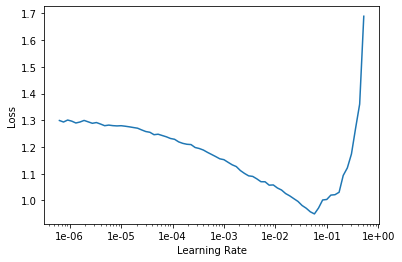

In [87]:
learn.recorder.plot()

In [ ]:
# let it train for hours
learn.fit_one_cycle(5, 5e-2, wd=0.2)
# learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.401376,0.636226,0.844785,55:02


In [89]:
learn.save('1')

In [150]:
# learn.recorder.plot_losses(skip_start=10000)

In [151]:
learn.model.embeds[0]    # IDA_RESULT

Embedding(4, 3)

In [105]:
learn.model.embeds[1]    # MAKE1

Embedding(20, 9)

In [64]:
learn.model.embeds[8]    # ACCOUNT_NUMBER

Embedding(134289, 600)

In [97]:
# type(learn.model.embeds[0])

In [56]:
# learn.model.embeds[0].weight

In [90]:
learn.model.embeds[8].weight.data

tensor([[-4.0217e-43,  4.1619e-43, -2.8446e-43,  ...,  4.5542e-43,
          2.4383e-43,  2.7886e-43],
        [ 3.0943e-03, -1.8236e-02,  2.5435e-02,  ...,  3.6874e-02,
          2.4824e-02, -1.2163e-02],
        [ 5.5918e-03, -4.1740e-02, -2.5799e-02,  ..., -3.4137e-02,
          3.6049e-03, -5.3339e-02],
        ...,
        [-1.3406e-02,  2.0176e-02,  1.5064e-02,  ...,  3.7168e-03,
         -1.2022e-03,  1.2137e-03],
        [ 1.9610e-03,  1.1200e-02,  2.2670e-02,  ...,  3.2710e-03,
         -6.2649e-03,  2.9609e-05],
        [-5.3541e-03, -2.0723e-02,  2.3874e-02,  ..., -1.6706e-02,
         -3.4317e-02,  2.9802e-02]])

In [91]:
account_number_weights = learn.model.embeds[8].weight.data.cpu().numpy()

In [92]:
account_number_weights.shape

(192707, 600)

In [93]:
type(acct_keys)

numpy.ndarray

In [94]:
len(acct_keys)

192707

In [95]:
len(inner_train_df['ACCOUNT_NUMBER'].unique())

192706

In [123]:
# for embed in account_number_weights:
#     print(embed)

In [124]:
# acct_embed = {}
# i = 0
# for acct_key in acct_keys:
#     acct_embed[acct_key] = account_number_weights.item(i)
#     i += 1

In [125]:
# acct_embed

In [126]:
# len(acct_embed)

In [96]:
import pickle as pkl
# save away ordered account numbers
with open('ivr_backup_data/account_keys.pkl', 'wb') as key_file:
    pkl.dump(acct_keys, key_file)
# and corresponding account embeddings
with open('ivr_backup_data/account_embeds.pkl', 'wb') as embed_file:
    pkl.dump(account_number_weights, embed_file)

In [97]:
# need to assign color to accounts. trouble is some accounts have multiple orders and therefore multiple colors
# pick the highest severity in that case
color_df = inner_train_df[['ACCOUNT_NUMBER', 'ACTIVE_WATCH_RESULT']]
account_group_df = color_df.groupby(by='ACCOUNT_NUMBER').max()

In [98]:
account_group_df.head()

,ACTIVE_WATCH_RESULT
ACCOUNT_NUMBER,
571,1
9660,1
49364,2
73801,1
141229,1


In [99]:
account_group_df.to_csv('ivr_backup_data/active_watch_result.csv')

In [145]:
acct_keys

array(['#na#', '9660', '49364', '162095', ..., '4294858705', '4294886254', '4294907800', '4294954959'], dtype='<U21')

In [137]:
len(account_group_df)

134219

In [131]:
inner_train_df.shape

(156246, 82)

In [129]:
# type(account_number_weights)

In [160]:
# def create_account_map(number, code):
#     try:
#         number = int(number)
#     except:
#         print('number={}', number)
#     return pd.Series([number, code],index=['account','code'])

In [103]:
# acct_number_df = pd.concat([df.ACCOUNT_NUMBER, df.ACCOUNT_NUMBER.astype('category').cat.codes.rename("code", inplace=True)], axis=1)

In [171]:
# acct_number_df.ACCOUNT_NUMBER.astype(np.int16)

In [174]:
# df.ACCOUNT_NUMBER

In [175]:
# df.ACCOUNT_NUMBER.astype('category').cat.codes

In [104]:
# account_vector = {}
# i = 0
# for account_number in train_account_list:
#     account_vector[account_number] = account_number_weights[i]
#     i += 1

In [131]:
len(account_number_weights[0])

600

In [87]:
model1_weights = learn.model.embeds[31].weight.data.cpu().numpy()

In [89]:
model1_weights.shape

(64, 16)

In [84]:
model1_keys = np.concatenate([['#na#'],inner_train_df['MODEL1'].cat.categories.values])

In [85]:
model1_keys

array(['#na#', 'Accessory', 'G8 ThinQTM', 'Galaxy A50', ..., 'iPhone XS Max', 'moto e5 play', 'moto e⁶',
       'moto g7 power'], dtype=object)

In [90]:
len(model1_keys)

64

In [88]:
with open('ivr_backup_data/model1_keys.pkl', 'wb') as model1_key_file:
    pkl.dump(model1_keys, model1_key_file)
# and corresponding account embeddings
with open('ivr_backup_data/model1_embeds.pkl', 'wb') as model1_embed_file:
    pkl.dump(model1_weights, model1_embed_file)

In [93]:
sku1_weights = learn.model.embeds[36].weight.data.cpu().numpy()
sku1_keys = np.concatenate([['#na#'],inner_train_df['SKU1'].cat.categories.values])
len(sku1_weights), len(sku1_keys)

(502, 502)

In [94]:
with open('ivr_backup_data/sku1_keys.pkl', 'wb') as sku1_key_file:
    pkl.dump(sku1_keys, sku1_key_file)
# and corresponding account embeddings
with open('ivr_backup_data/sku1_embeds.pkl', 'wb') as sku1_embed_file:
    pkl.dump(sku1_weights, sku1_embed_file)

In [68]:
learn.load('1');

In [ ]:
learn.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.124950,0.294154,0.908579,21:43
1,0.122016,0.302155,0.911574,22:43


epoch 0
epoch 1
epoch 2


In [73]:
learn.save('2')

In [100]:
learn.export()